# <center>IEE 520: Fall 2019 Mini Project #2</center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## <center>Library needed for k Nesrest Neighbour
</center>

In [ ]:
# For compatibility with Python 2
from __future__ import print_function

# To load datasets
from sklearn import datasets

# To import the classifier (K-Nearest Neighbors Classifier and Regressor)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# To measure accuracy
from sklearn import metrics

from sklearn.model_selection import KFold

# To support plots
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

# To display all the plots inline
%matplotlib inline 

# To splite the data
from sklearn.model_selection import train_test_split, cross_val_score

seed = 2357

In [ ]:
# To increase quality of figures
plt.rcParams["figure.figsize"] = (20, 10)

# <center>Loading Data</center>

In [ ]:
#import data
import pandas as pd
path = "/content/drive/Shared drives/IEE520/Mini Project 2/Avila_2000_Random_rows.csv"
data = pd.read_csv(path)

## <center>Size of Data</center>

In [ ]:
print(data.shape)

(2000, 11)


In [ ]:
#import random
#data = data.sample(n=1000, random_state=seed)

In [ ]:
#print(data.shape)

### <center> Summary of Data </center>

In [ ]:
data.describe()

,Intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.004015,0.005610,-0.018357,0.011850,-0.006059,0.000200,-0.051972,0.004971,-0.021343,-0.010651
std,0.937483,0.934714,1.013025,1.010174,0.993026,1.002806,1.066574,0.988453,1.012788,1.035888
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.011262,-4.426048,-6.719324
25%,-0.128929,-0.259834,0.050694,-0.542563,0.172340,-0.598658,-0.044076,-0.515698,-0.403638,-0.510161
50%,0.056229,-0.063555,0.207175,0.112964,0.261718,-0.038073,0.220177,0.104134,0.032902,-0.027021
75%,0.204355,0.211237,0.349432,0.651257,0.261718,0.564038,0.446679,0.639509,0.469443,0.539625
max,9.943651,19.470188,6.260173,3.987152,1.066121,4.508898,4.901228,4.510897,2.963961,3.744023


Compute frequency count of each class

In [ ]:
pd.Series(data.iloc[:, -1]).value_counts().sort_index()

A    842
C     24
D     57
E    191
F    384
G     93
H     82
I    164
W     10
X    105
Y     48
Name: Class: A, B, C, D, E, F, G, H, I, W, X, Y, dtype: int64

**From the line above, we can know that the target values are highly imbalance. Class W has only 5 observations.**

# <center>Preprocessing data</center>

### <center> Encoding class labels to number </center>

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data = data.to_numpy() 

Extract feature and class label

In [ ]:
X = data[:, 0:-1]
y = data[:, -1]

### <center> Standardizing Features</center>

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### <center> Split to train and test set </center>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=seed)

## <center> Choosing K </center>

### <center> Choose by analyzing the cross-validation error (1- accuracy score) </center>

In [ ]:
cv_errors = []
n_fold=5
max_num_neighbour = 30
neighbors = list(np.arange(1, max_num_neighbour+1))

# perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=n_fold, scoring='accuracy')
    cv_errors.append(1-scores)
    
cv_errors = zip(*cv_errors)

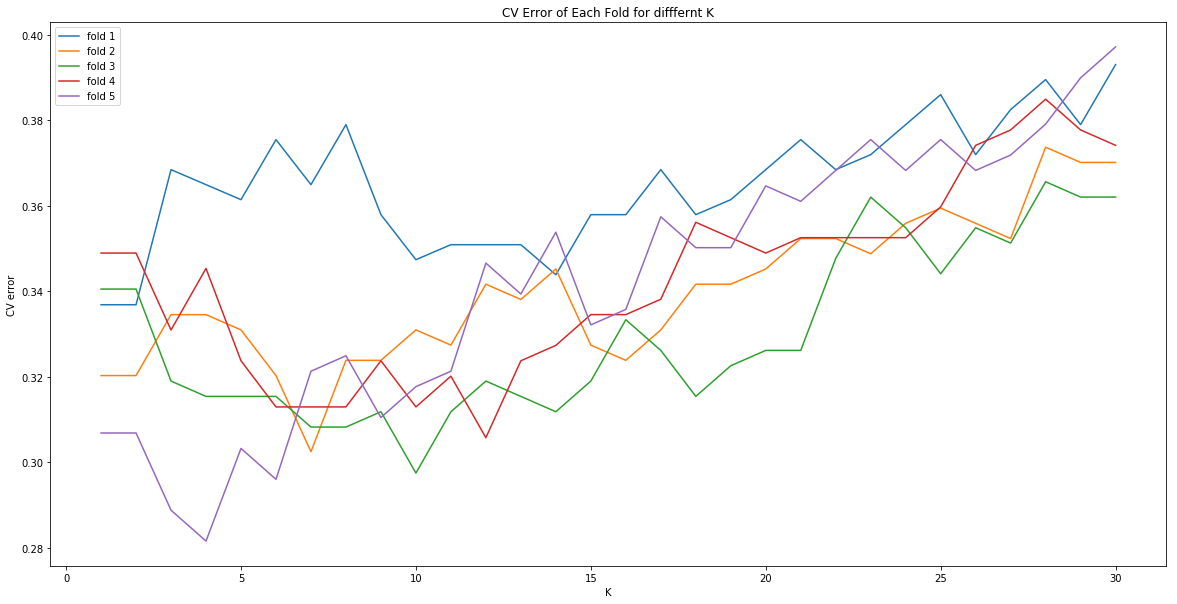

In [ ]:
plt.figure()

folds = np.arange(1, n_fold+1)
for i in folds:
  plt.plot(neighbors, cv_errors[i-1], label=('fold '+str(i)))

plt.title('CV Error of Each Fold for difffernt K')
plt.xlabel('K')
plt.ylabel('CV error')
plt.legend()

### <center> Select k that Attains Min CV Error in Each Fold </center>

In [ ]:
for i in np.arange(0, n_fold):  
  min_error = min(cv_errors[i])
  min_k = [k+1 for k, v in enumerate(cv_errors[i]) if v == min_error]
  
  print("For fold", str(i+1), ', the min test error is', str(min_error), 'attaining at index/indicies', str(min_k))

For fold 1 , the min test error is 0.33684210526315794 attaining at index/indicies [1, 2]
For fold 2 , the min test error is 0.302491103202847 attaining at index/indicies [7]
For fold 3 , the min test error is 0.29749103942652333 attaining at index/indicies [10]
For fold 4 , the min test error is 0.3057553956834532 attaining at index/indicies [12]
For fold 5 , the min test error is 0.2815884476534296 attaining at index/indicies [4]


### <center> Visualization (for Model Complexity Analysis)</center>

In [ ]:
# Here we use closure to store the related variables
def create_plot_knn_classification(_X, _y):
    X, y = _X, _y
    def plot_knn(k=3, weighted=True):
        h = .02  # step size in the mesh
        cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
        cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
        if weighted:
            clf = KNeighborsClassifier(k, weights='distance')
        else:
            clf = KNeighborsClassifier(k, weights='uniform')
        clf.fit(X, y)
        x1_min = X[:, 0].min() - 1
        x1_max = X[:, 0].max() + 1
        x2_min = X[:, 1].min() - 1
        x2_max = X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                               np.arange(x2_min, x2_max, h))
        Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx1.shape)
        plt.figure()
        plt.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        plt.title("Nearest neighbor classification (k = %i, %s)"
                  % (k, 'weighted' if weighted else 'unweighted'))
        plt.show()
    return plot_knn

In [ ]:
interact(create_plot_knn_classification(X_train[:, :2], y_train), k=(1, max_num_neighbour, 1))

interactive(children=(IntSlider(value=3, description=u'k', max=30, min=1), Checkbox(value=True, description=u'…

<function __main__.plot_knn>

### Answer to Q1c: From the above, we can see that best K's that attains the minimum error in each fold are not the same.

### <center> Hypertuning model parameters using GridSearchCV </center>

In [ ]:
from sklearn.model_selection import GridSearchCV #create new a knn model

knn2 = KNeighborsClassifier(weights='distance')#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': neighbors}#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=n_fold)#fit model to data
knn_gscv.fit(X_train, y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
print("Using GridSearchCV, the optimum value of k is", str(knn_gscv.best_params_.values()))

Using GridSearchCV, the optimum value of k is [10]


### <center> Select K by Mean CV Error </center>

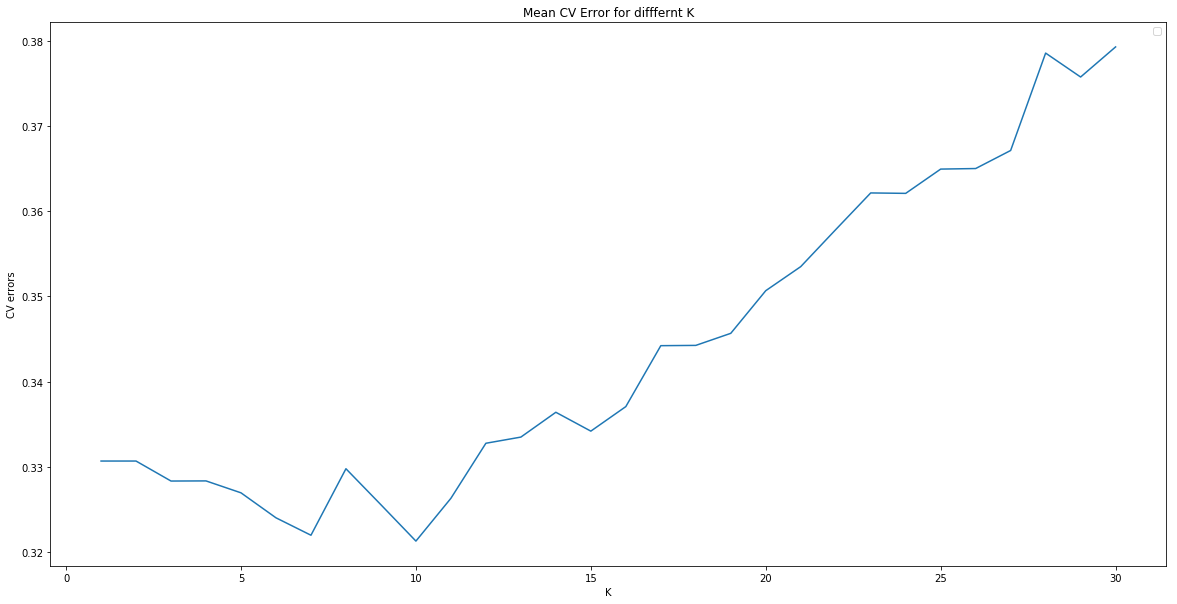

In [ ]:
mean_cv_errors =np.mean(cv_errors, axis = 0)

plt.plot(neighbors, mean_cv_errors)
plt.title('Mean CV Error for difffernt K')
plt.xlabel('K')
plt.ylabel('CV errors')
plt.legend()



In [ ]:
k_mse = [k+1 for k, v in enumerate(mean_cv_errors) if v == min(mean_cv_errors)]

print('The minimum mean test error is', str(min(mean_cv_errors)), 'attaining at index/indicies', str(k_mse))

The minimum mean test error is 0.3212918971090744 attaining at index/indicies [10]


# <center>Model evaluation</center>

## <center> Generalization Error </center>

### From the above results, we therefore pick K = 10

In [ ]:
k=10
model = KNeighborsClassifier(k, weights='distance')
model.fit(X_train, y_train)
yhat = model.predict(X_test)
test_error = 1- metrics.accuracy_score(yhat, y_test)
print(test_error)

0.3466666666666667


## <center> Confussion Matrix for Test Data</center>

In [ ]:
!pip install pandas_ml

     |████████████████████████████████| 81kB 6.6MB/s 
  Created wheel for pandas-ml: filename=pandas_ml-0.6.1-cp27-none-any.whl size=99434 sha256=5f14cb80cb89c6754249785e88073423081b9acabe1cae712637a58d505a3509
  Stored in directory: /root/.cache/pip/wheels/a4/a7/e0/6032cf33b7b780cdfc317752df74d6c0b2ed5a7031ab13f5e9
Successfully built pandas-ml


/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/usr/local/lib/python2.7/dist-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
/usr/local/lib/python2.7/dist-packages/pandas_ml/confusion_matrix/bcm.py:330: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


Predicted    0  1  2   3    4   5   6   7  8   9  10  __all__
Actual                                                       
0          222  0  0   2   31   2   5   0  0   0   0      262
1            4  1  0   2    0   0   0   0  0   0   0        7
2            3  0  6   3    3   0   1   0  0   0   0       16
3           13  0  1  24    7   4   1   1  0   2   0       53
4           61  0  0   0   52   4   1   0  0   0   0      118
5            9  0  0   1    5   9   0   0  0   0   0       24
6           12  0  0   1    2   3   9   0  0   0   0       27
7            4  0  0   0    0   0   0  39  0   0   0       43
8            3  0  0   2    0   0   0   0  0   0   0        5
9            2  0  0   1    1   0   0   0  0  22   2       28
10           6  0  0   0    0   0   0   1  0   2   8       17
__all__    339  1  7  36  101  22  17  41  0  26  10      600


/usr/local/lib/python2.7/dist-packages/pandas_ml/confusion_matrix/bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
/usr/local/lib/python2.7/dist-packages/pandas_ml/confusion_matrix/bcm.py:267: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FP) / self.PositiveTest)
/usr/local/lib/python2.7/dist-packages/pandas_ml/confusion_matrix/bcm.py:302: RuntimeWarning: invalid value encountered in true_divide
  * (self.TN + self.FP) * (self.TN + self.FN)))
/usr/local/lib/python2.7/dist-packages/pandas_ml/confusion_matrix/bcm.py:330: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


Confusion Matrix:

Predicted    0  1  2   3    4   5   6   7  8   9  10  __all__
Actual                                                       
0          222  0  0   2   31   2   5   0  0   0   0      262
1            4  1  0   2    0   0   0   0  0   0   0        7
2            3  0  6   3    3   0   1   0  0   0   0       16
3           13  0  1  24    7   4   1   1  0   2   0       53
4           61  0  0   0   52   4   1   0  0   0   0      118
5            9  0  0   1    5   9   0   0  0   0   0       24
6           12  0  0   1    2   3   9   0  0   0   0       27
7            4  0  0   0    0   0   0  39  0   0   0       43
8            3  0  0   2    0   0   0   0  0   0   0        5
9            2  0  0   1    1   0   0   0  0  22   2       28
10           6  0  0   0    0   0   0   1  0   2   8       17
__all__    339  1  7  36  101  22  17  41  0  26  10      600


Overall Statistics:

Accuracy: 0.6533333333333333
95% CI: (0.6137375242022135, 0.6914110734506197)
No Informati

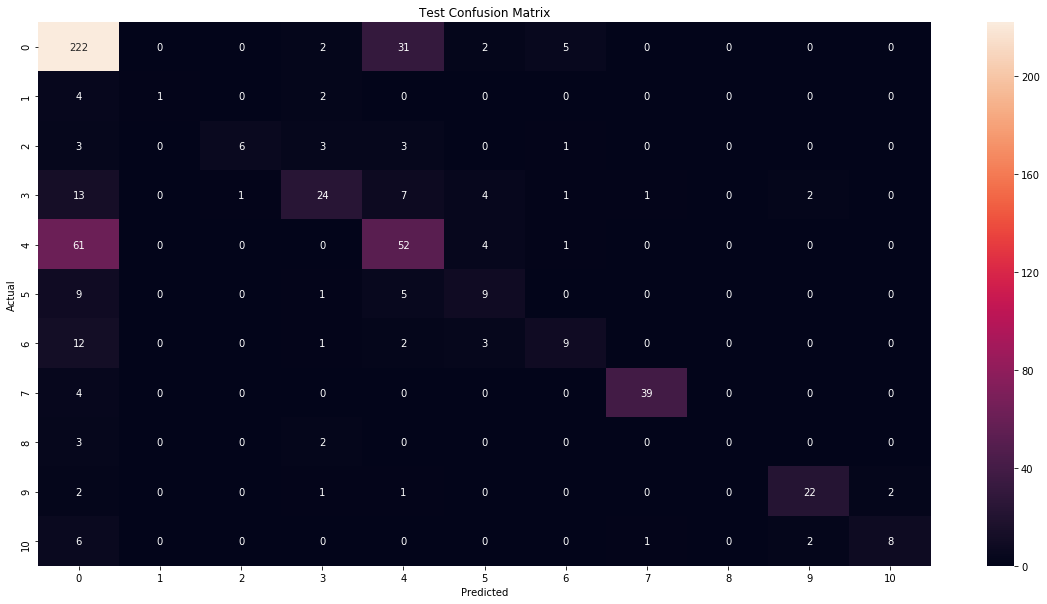

In [ ]:
from pandas_ml import ConfusionMatrix

cm = ConfusionMatrix(y_test, yhat)
print(cm)

cm.print_stats()
ax = cm.plot(backend='seaborn', annot=True, fmt='g')
ax.set_title('Test Confusion Matrix')
plt.show()